<center><h1>Tutorial 2 - Analysis at the issue level</h1><center/>

This is the 2nd tutorial notebook, following the 1st one: `Introductory_tutorial_(1)`. <br/>
This tutorial aims to explain you how to use the functions made for analysis **at the issue level**.

Analysis at the issue level has been focused on issue frequency through time, and access right statistics (license type).

If you do not understand some parts of the notebook, in particular for any part regarding loading datasets, transformation of tables etc, please refer to the first  tutorial notebook 1 : `Introductory_tutorial_(1)`.

---

## Table of Content

[Introduction](#introduction)

[Setup](#setup)

[1. Issue frequency](#issue_freq)
> [1.1 Naive example](#issue_freq_1)<br/>
> [1.2 Loading data](#issue_freq_2)<br/>
> [1.3 Filtering](#issue_freq_3)<br/>
>> [1.3.1 Specify newspapers](#issue_freq_3_1)<br/>
>> [1.3.2 Specify year bounds](#issue_freq_3_2)<br/>

> [1.4 Group plotting](#issue_freq_4)<br/>

[2. Licences](#licences)
> [1.1 Stats table](#licences_1)<br/>
> [1.2 Plotting](#licences_2)<br/>

---

## Introduction

There are 2 groups of functions that you may use for the issues analysis :
- Analysis of **issues frequency** : `plt_freq_issues_time`
- Analysis of **access rights frequency** at the issues level : `multiple_ar_np`, `license_stats_table`, `plot_licences`

Both functions `plt_freq_issues_time` and `plot_licences` display a plot, and return a pandas dataframe.

The other two functions for access rights help providing statistics.

---

<a id='setup'></a>
## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Specify path for imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#### Plotting setup
For better rendering, we recommand importing the <a href="https://seaborn.pydata.org/">seaborn python library</a> and using a grid (white or dark, depending on your preference).

In [3]:
import seaborn as sns
sns.set(style="darkgrid")
#sns.set(style="whitegrid")

---

<a id='issue_freq'></a>
## 1. Issue frequency

The main function regarding issue frequency is `plt_freq_issues_time`. <br/>
It computes the number of issues by newspaper by year (or by decade, depending on parameter `time_gran`), and displays it on a plot. The result of the operation (a pandas dataframe) is also returned. 

You can pass the function several **filters** (see tutorial (1)), about years, newspapers, country, properties. It will call the function `filter_df`, presented in the 1st tutorial.

This function is "all in one". What we mean by that is that it does all for you : 
- loading the sql issues table as a pandas dataframe,
- adding the necessary columns (e.g. decade), 
- grouping by and counting

You only need to specify one parameter : `time_gran`, which can be either `'year'` or `'decade'`, depending on how precise ou want the frenquency statistic to be.

In [4]:
from impresso_stats.visualization import plt_freq_issues_time

<a id='issue_freq_1'></a>
### 1.1 Naive example
Let's first call the function in the simplest way, to give you an idea on what it does. The minimum you have to specify is the "time granularity", i.e. `'year'` or `'decade'`.

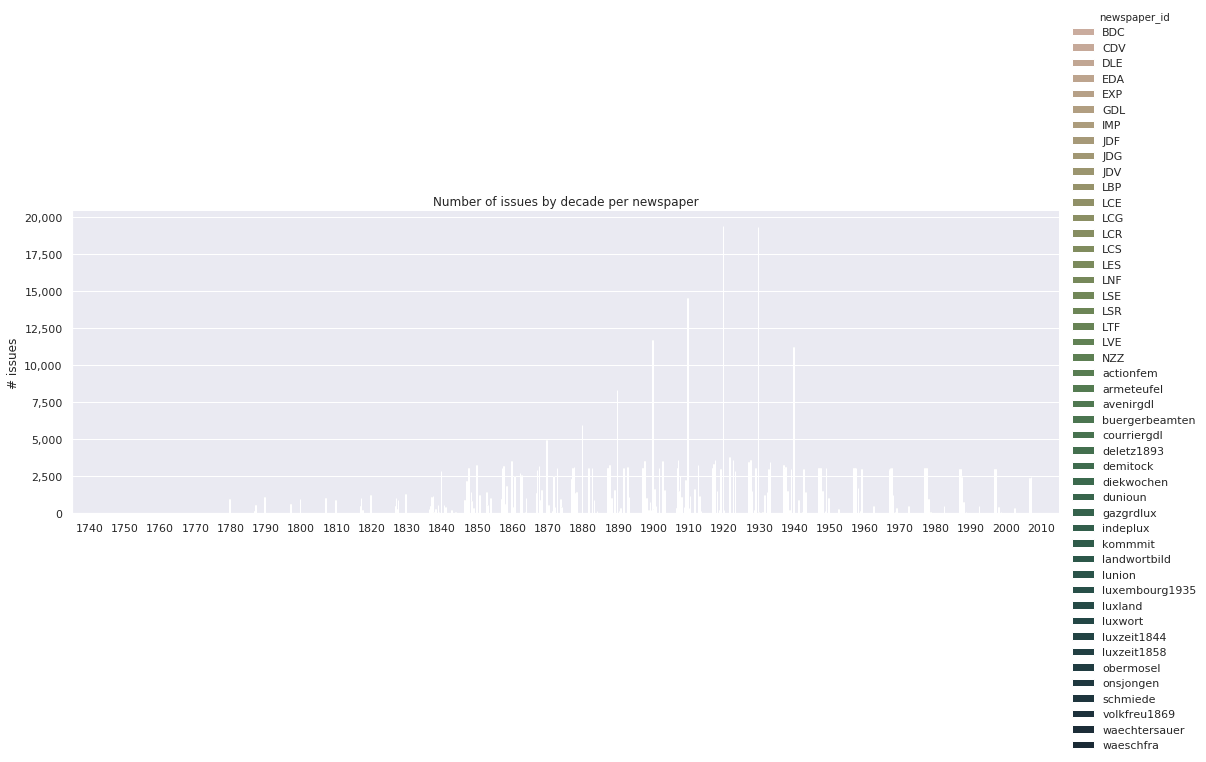

In [5]:
df = plt_freq_issues_time('decade')

##### Snapshot of the returned dataframe

In [6]:
df.head()

,newspaper_id,decade,count
0,BDC,1740,0.0
1,BDC,1750,0.0
2,BDC,1760,0.0
3,BDC,1770,0.0
4,BDC,1780,0.0


##### Explanation
As there is a lot of newspapers (and also a lot of decades), this plot shows nothing: we can't see the colors. <br/>You have two options to make it more readable : **plot by batch** or **filter** (or both !). 

The two options and explained below.

##### Remark
As said above, the function does all for you, but each time you call it, it reloads the table, adds the decade columns etc. If you are going to try several visualization (as we will do now), we recommend that you load the table as a pandas dataframe yourself, and do all necessary preprocessing ourself once, and then **pass the final dataframe as parameter to the function**. It will be computationnally lighter (and thus faster).

<a id='issue_freq_2'></a>
### 1.2 Loading data
If any part of this section seem unclear, please refer to the 1st tutorial notebook `Introductory_tutorial_(1).ipynb`.

In [7]:
from impresso_stats.sql import db_engine, read_table
from impresso_stats.helpers import decade_from_year_df

In [8]:
engine = db_engine()
issues_df = read_table('impresso.issues', engine)

In [9]:
issues_df = decade_from_year_df(issues_df)

##### Calling the function with a dataframe
Now that you have loaded the dataframe, you would call the function the same way as before, but with a new parameter.

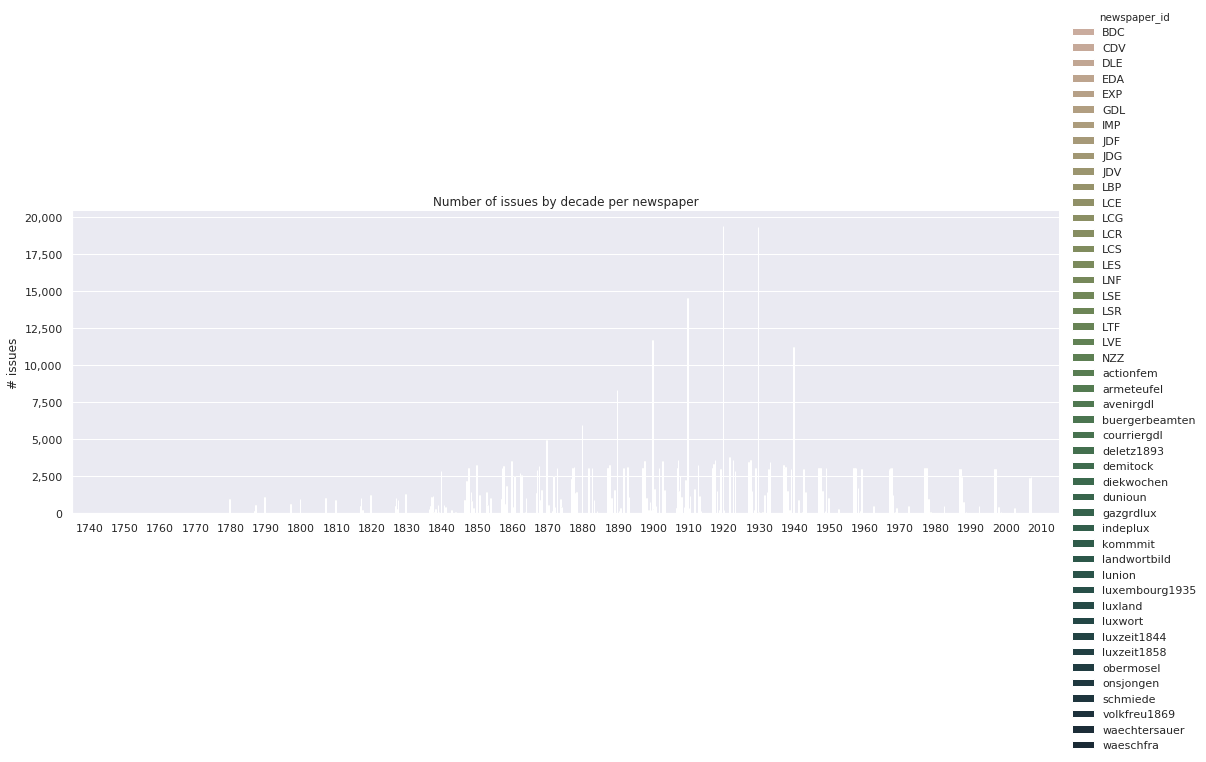

In [10]:
# This does exactly the same as above.
df = plt_freq_issues_time('decade', issues_df)

<a id='issue_freq_3'></a>
### 1.3 Filtering
You can apply any kind of filter, as shown in tutorial (1).

Let's see some examples.

<a id='issue_freq_3_1'></a>
#### 1.3.1 Specify newspapers
Let's say you would like to know the number of issues published for two specific newspapers (on the same plot) : *Gazette de Lausanne (GDL)* and *Journal de Genève (JDG)*, for each year.

##### Remark
*As you only have two newspapers here, it is fine to plot by year, but if you have more and the newspapers have issues over a lot of years, if may not render well. You may have to chose specific years, or plot by decade.*

In [11]:
sns.set_style('darkgrid')

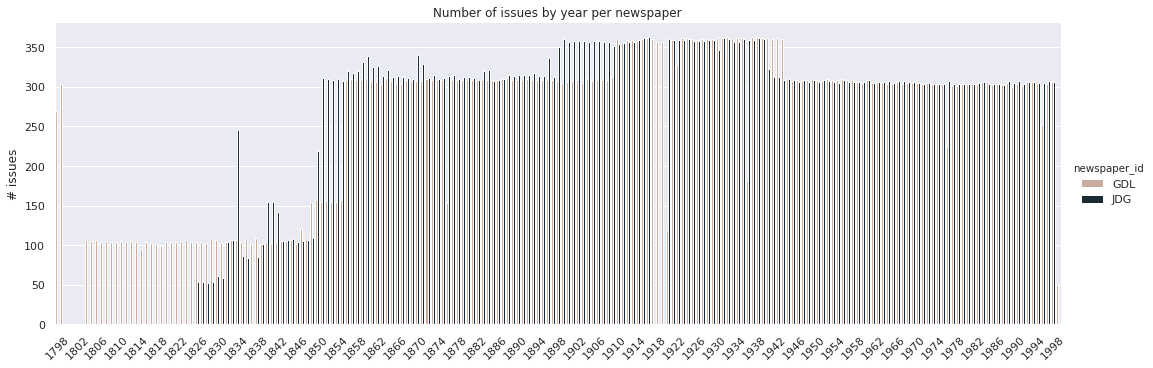

In [12]:
df = plt_freq_issues_time('year', np_ids=['JDG', 'GDL'], df=issues_df)

##### Explanation
As there are issues for a lot of years, only one year on 4 is displayed on the x axis. <br/>
In this example, several periods might seem interesting :
- (a) *JDG* seems to have several gaps : around 1834/1838, around 1914/1922
- (b) *GDL* seems to have particular years around : 1874, 1920, 1936, ... where you see drops in the number of issues.
- (c) between 1846 and 1858, it may be interesting to compare the number issues for both journals as they evolve differently. 

You might want to see more closely what happens and at which date exactly. For that purpose you need to "zoom" on the plot, by specifying the years you would like to see. Let's see an example below.

<a id='issue_freq_3_2'></a>
#### 1.3.2 Specify year bounds
**Let's see how to "zoom" for (c).**

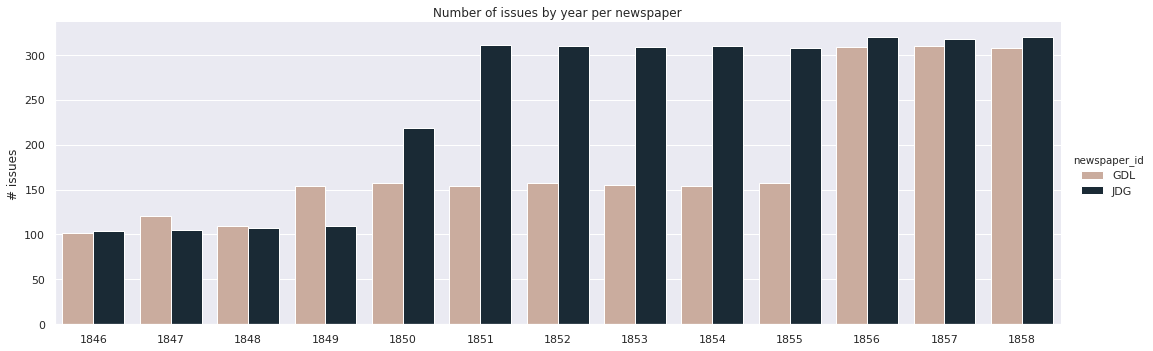

In [13]:
df = plt_freq_issues_time('year', np_ids=['JDG', 'GDL'], \
                          df=issues_df, start_date=1846, end_date=1858)

##### Explanation
Here you can see more clearly that :
- between 1848 and 1856 the number of issues for both journals has been multipled by 3 (from 100 to 300)
- the *Journal de Genève* was the first to increase its number of issues, progressively : 100 in 1849 / 200 in 1850 / 300 in 1851 (approximately)
- the *Gazette de Lausanne* first increased a little bit its number of issues from 100 to approximately 150 in 1849, and then more drastically 1856, to reach the same number as *Journal de Genève*, 5 years later.

It may be interesting to see if one increase could have influenced the other, if the same phenomenon has happenned around the same years for other journals, if it can be related to historical events, etc.

If you look again at the first plot comparing the two journals, you can see that a similar phenomenon seem to happen around 1894/1910, and 1938/1946.

You now have the tools to investigate deeper on this !

**Let's see how to zoom for (a)**

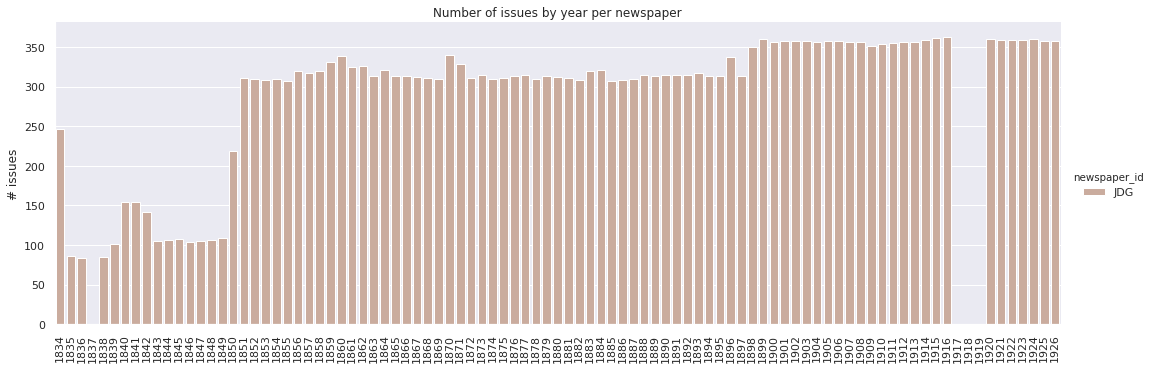

In [14]:
df = plt_freq_issues_time('year', np_ids=['JDG'], df=issues_df, start_date=1834, end_date=1926)

##### Explanation
Here you can see more clearly which years are missing :
- 1837
- between 1917 and 1919 (included) 

It may be interesting to see why there years are missing : did *Journal de Genève* not publish any issue during these years for a particular reason ? Are they missing from the dataset ? And in that case, why ?

<a id='issue_freq_4'></a>
### 1.4 Group plotting
In section 1.3, you have seen how to filter. The other option for plotting a lot of data, if you do not want to drop any information is to **plot "by batch"**.

By that we mean that you can specify a parameter `batch_size` (typically between 2 and 6), indicating the number of newspapers you want to be displayed on each plot.

Let's see an example for better understanding.

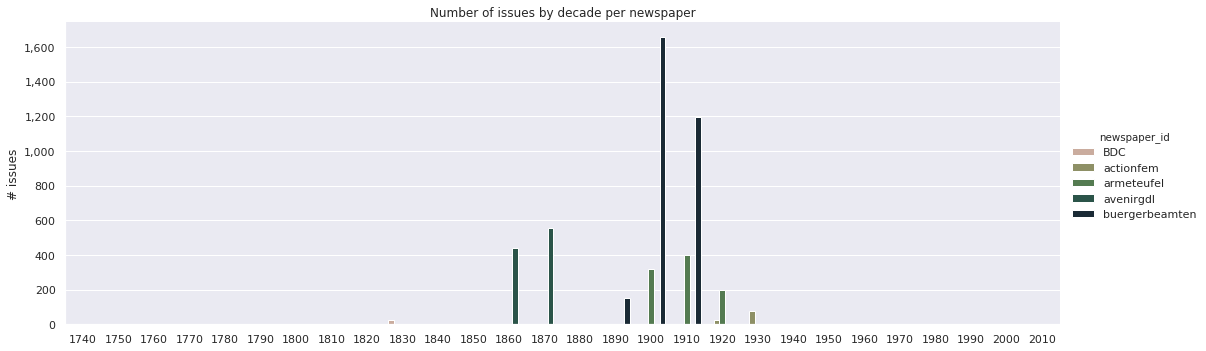

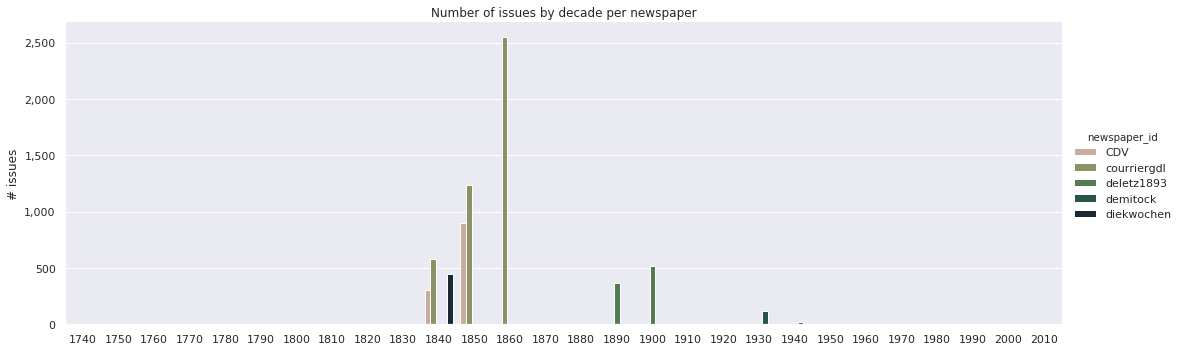

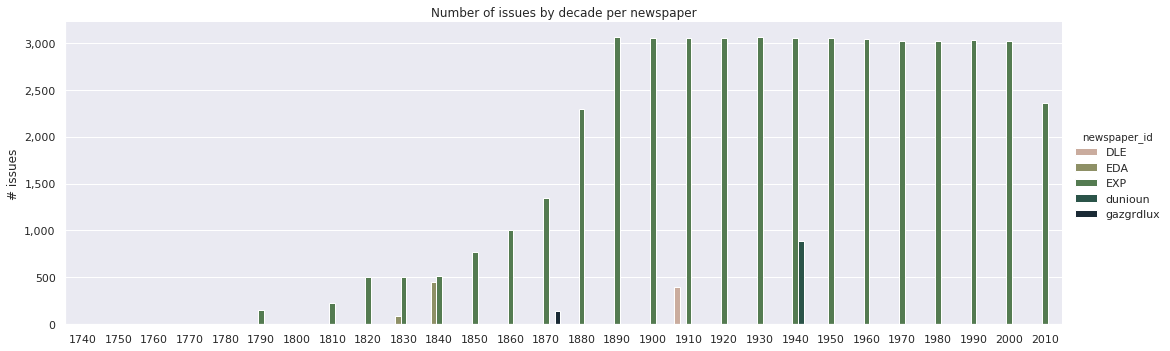

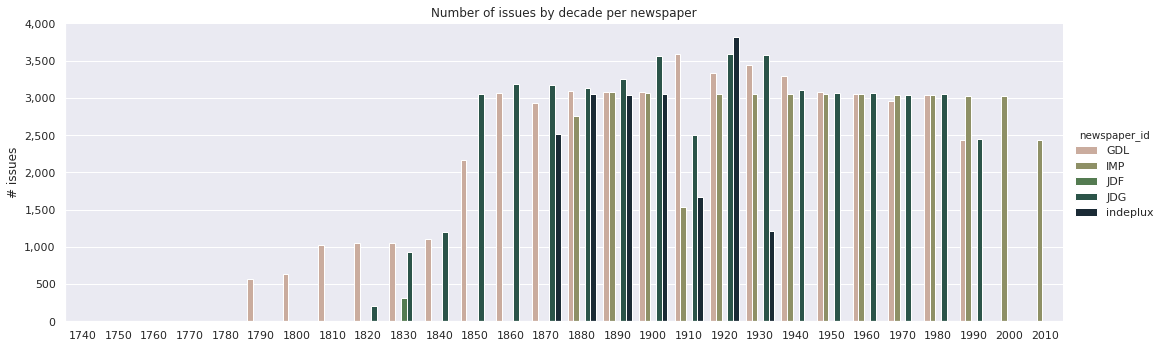

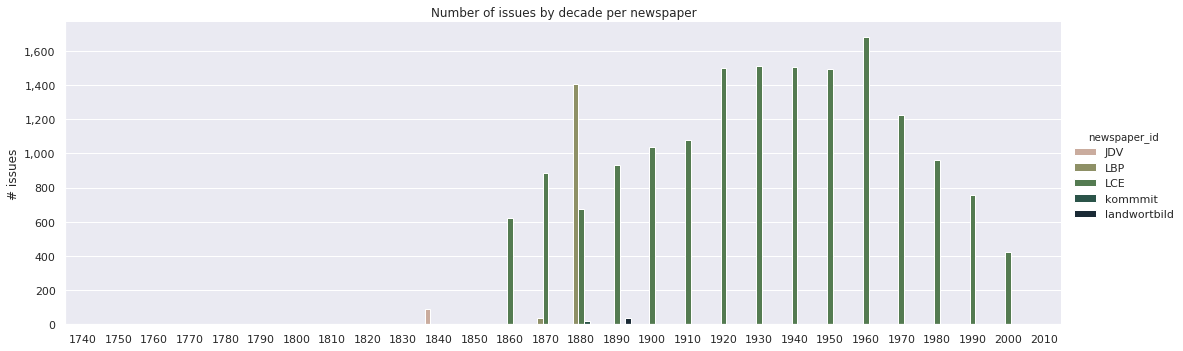

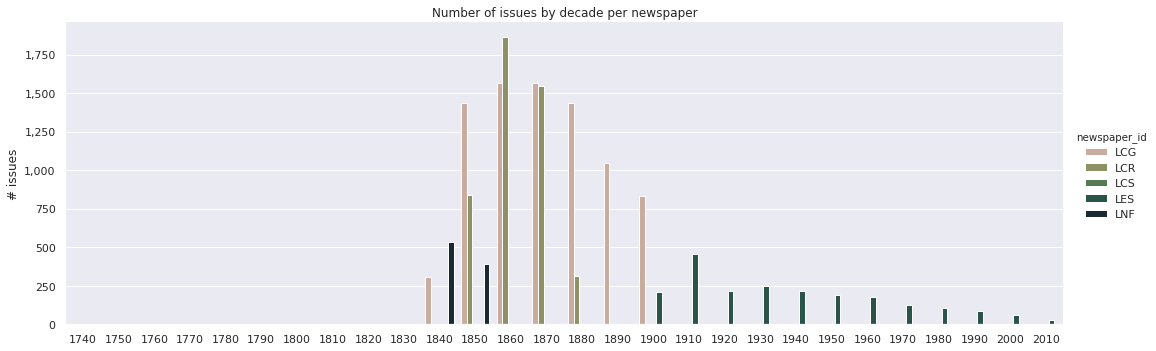

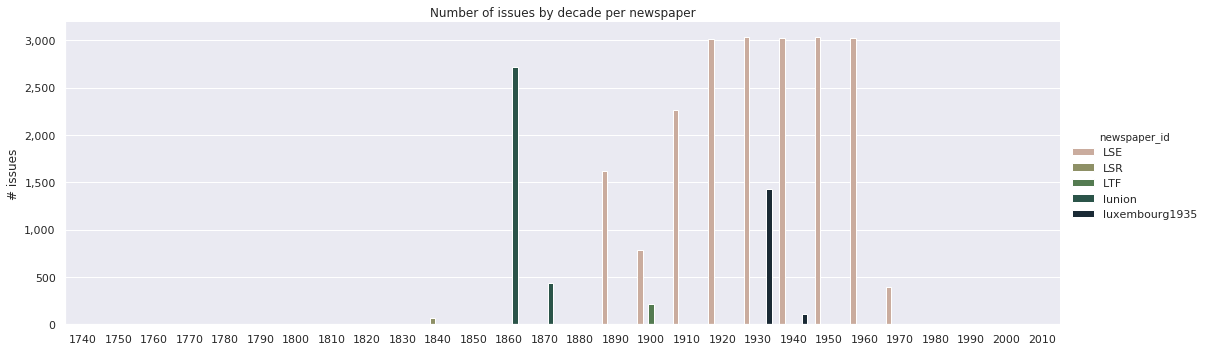

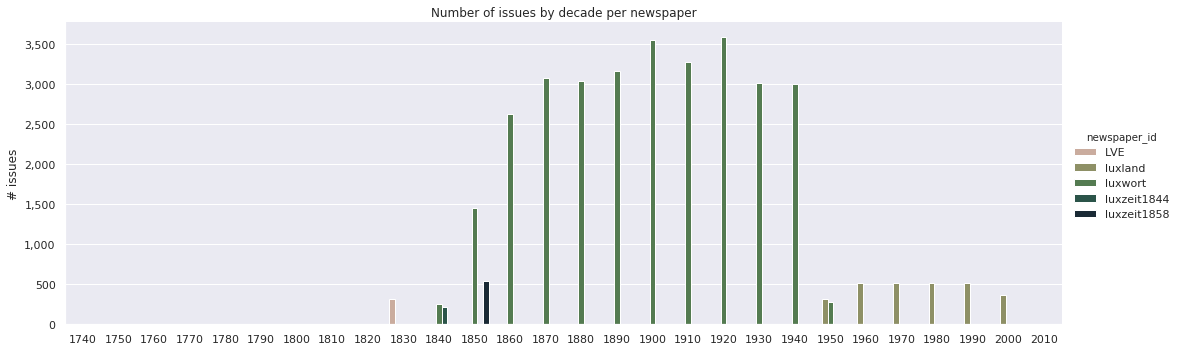

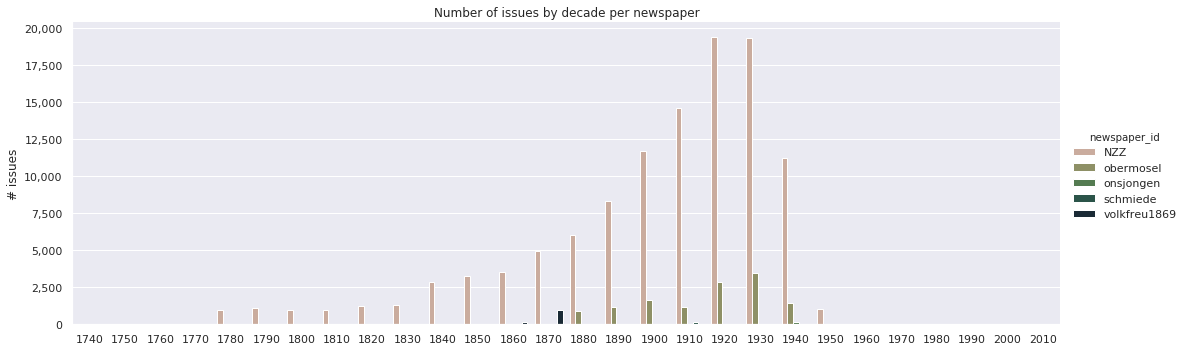

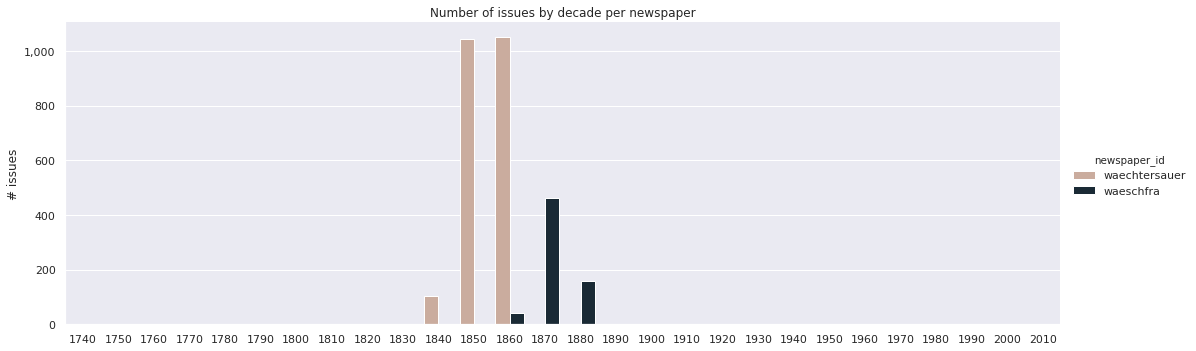

In [15]:
df = plt_freq_issues_time('decade', issues_df, batch_size=5)

##### Explanation
The x axis labelling is the same for all, whereas the y axis depends on each plot.

The ordering in which newspapers are grouped is simply the alphabetical order. Therefore as you can see on the plots above, the groups may not be very significants : 
- there are several plots on which the years on which newspapers have published issues do not overlap at all, 
- there are several plots on which the number of issues published for the different newspaper is very different and not easily comparable (e.g. if one is on average 10 times larger that the others).

Using filtering combined with batches can lead to better results. You may want to see only Swiss newspapers, only during the 19th century for example (see below).

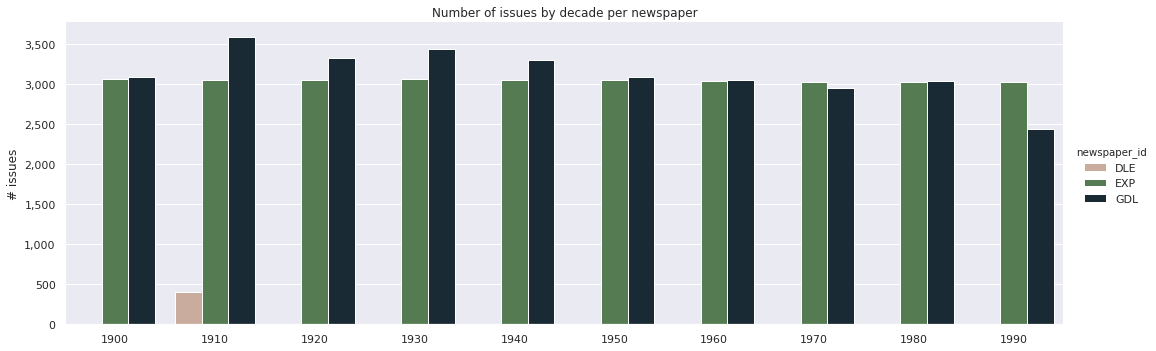

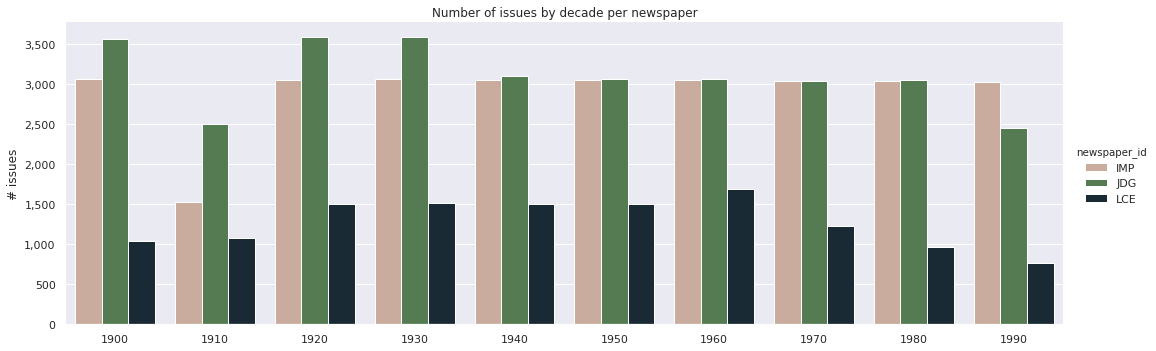

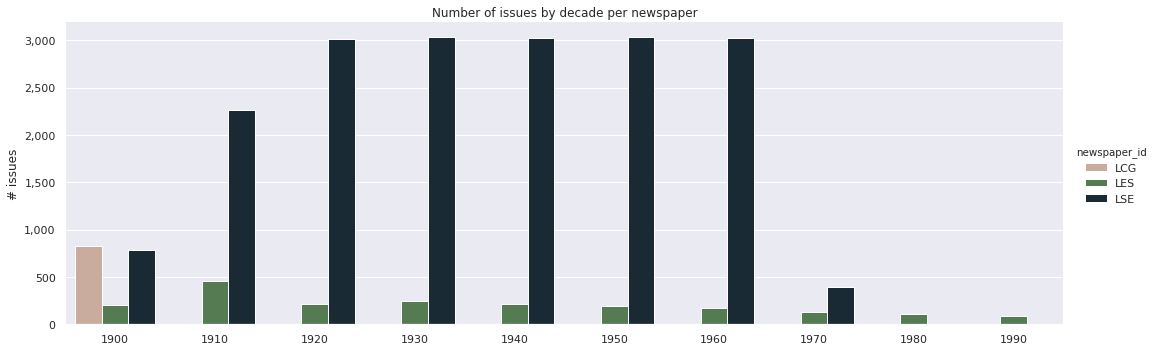

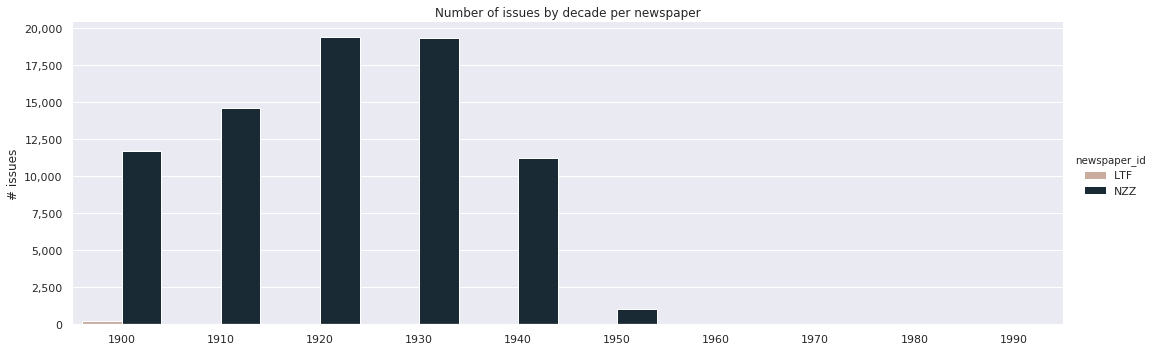

In [16]:
df = plt_freq_issues_time('decade', start_date=1900, end_date=1999, df=issues_df, batch_size=3, country='CH')

##### Explanation
From these you can see sereval things that may be interesting to investigate further. For example:
- *DLE* seems to have published only in one decade during this century (1st plot). Same for *LTF* or *LCG*.
- Some newspapers seem to have published more regularly.
- *NZZ* has a very high number of issues compared to other journals.

In conclusion, the group plotting functionality is particularly useful if you wish to **visualize all at once** in order to select later what you are interested in and create more specific plots, without having to call the function X times by hand, with several newspaper IDs. <br/>

It is however not the best tool for doing analysis directly.

---

<a id='licences'></a>

## 2. Licences

From the dataset we use, access rights (aka licences) can have 3 values : Open public, open private, closed.

Statistics on feature which can only take three values can easily be analysed through a table giving numbers. It was more difficult for issues frequency over time because we had a lot of newspapers and a lot of yeats / decade.

For that reason you have three main functions at your disposal regarding licenses : 
- `multiple_ar_np` outputing the IDs of newspapers for which issues have several access rights levels (at least 2).
- `license_stats_table` which outputs a pandas dataframe containing statistics on access rights about the dataframe passed as parameter.
- `plt_licences` displaying a bar plot of the number of issues per access right type, either through time (decade only) or by newspaper.

Those functions are detailled below.

In [17]:
from impresso_stats.helpers import multiple_ar_np, filter_df_by_np_id, license_stats_table
from impresso_stats.visualization import plot_licences

<a id='licences_1'></a>

### 2.1 Stats table

Function `license_stats_table` takes as parameter a dataframe having columns `newspaper_id` and column `access_rights`, and return a table containing statistics on licences types per newspapers. 

Let's see the simplest example.

In [18]:
stats_table = license_stats_table(issues_df)

In [19]:
stats_table

access_rights,newspaper_id,Closed,OpenPrivate,OpenPublic,Total,rate_Closed,rate_OpenPrivate,rate_OpenPublic
0,BDC,0,0,23,23,0,0,100.0000%
1,CDV,0,0,"1,200","1,200",0,0,100.0000%
2,DLE,0,402,0,402,0,100.0000%,0
3,EDA,0,0,544,544,0,0,100.0000%
4,EXP,0,"46,196",8,"46,204",0,99.9827%,0.0173%
5,GDL,0,"51,062",8,"51,070",0,99.9843%,0.0157%
6,IMP,0,"40,227",1,"40,228",0,99.9975%,0.0025%
7,JDF,0,0,319,319,0,0,100.0000%
8,JDG,0,"49,131",0,"49,131",0,100.0000%,0
9,JDV,0,92,0,92,0,100.0000%,0


##### Explanation
This table is quite sparse, you can see a lot of zeros : most newspapers have issues having a simple access right type.

The most interesting way to use function `license_stats_table`, is on the dataframe containing only newspapers which have issues with several access right types. Typically you would find those newspapers by calling `multiple_ar_np`, then filter you dataframe for keeping only the interesting newspapers, and finally call `license_stats_table` to have a summary of statistics.

Let's see this example below:

In [20]:
# Get the IDs of newspapers having 
np_multiple_ar = multiple_ar_np(issues_df)

In [21]:
# This function as a type of filtering. One may also call function filter_df
filtered_df = filter_df_by_np_id(issues_df, np_multiple_ar)

In [22]:
stats_table_2 = license_stats_table(filtered_df)

In [23]:
stats_table_2

access_rights,newspaper_id,Closed,OpenPrivate,OpenPublic,Total,rate_Closed,rate_OpenPrivate,rate_OpenPublic
0,EXP,0,"46,196",8,"46,204",0,99.9827%,0.0173%
1,GDL,0,"51,062",8,"51,070",0,99.9843%,0.0157%
2,IMP,0,"40,227",1,"40,228",0,99.9975%,0.0025%
3,LCE,0,"16,291",1,"16,292",0,99.9939%,0.0061%
4,LSE,0,"20,182",1,"20,183",0,99.9950%,0.0050%
5,indeplux,"16,447",0,"1,903","18,350",89.6294%,0,10.3706%
6,luxwort,"16,027",0,"14,328","30,355",52.7986%,0,47.2014%
7,waeschfra,224,0,436,660,33.9394%,0,66.0606%


##### Explanation
This table is much condensed and contains much interesting insights.

Papers which have issues with several access rights can be grouped into three groups :
- Group 1 : Those for which almost 100% of their issues have the same access right level and for which other access right permissions are very rare. It is actually the case for all swiss newspapers which have several access rights : EXP, GDL, IMP, LCE and LSE. For the last three, only one issue among all has a different access right. We could investigate on whether this is an outlier and what it is due to. Note also that they all have the same access right majority : OpenPrivate (and minority : OpenPublic).
- Group 2 : Those for which most of their issues have the same access right level. It is the case for indeplux : almost 90% of its issues have access right Closed, whereas the left 10% are OpenPublic.
- Group 3 : Those for which the difference between the two access right levels is more balanced. It is the case for luxwort (53% closed vs 47% open public) and waeschfra (34% closed vs 66% open public). 

Based on these observations, we can investigate on the following questions :
- Where do the rare values in group 1 come from ? Errors from the dataset ? Particular issue-s ?
- Are the access right levels in group 2 and 3 linked to some other property of the issues or to the date in time ?

<a id='licences_2'></a>
### 2.2 Plotting
Function `plot_licences` takes as parameter:
- a `facet`: can be either of value `time` or value `newspaper`, depending on which dimension you wish to aggregate on, and have as x axis.
- a dataframe with columns 'access_rights' and another of value the same as the `facet`parameter.

It returns the aggregated dataframe and displays a plot on access right types. 
As for issues frequency through time, you can pass filtering parameters to the function in order to sharpen you results. Exploration of these filters is left to you !

See the following examples.

#### Time facet
***Note:*** *The only time granularity enabled here is decade.*

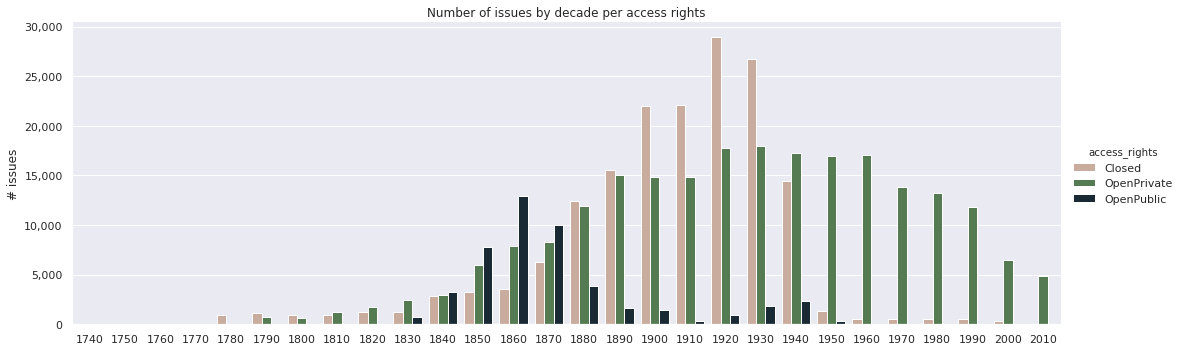

In [24]:
df = plot_licences(facet='time', df=issues_df)

In [25]:
df.head()

,access_rights,decade,count
0,Closed,1740,0.0
1,Closed,1750,0.0
2,Closed,1760,0.0
3,Closed,1770,0.0
4,Closed,1780,940.0


#### Newspaper facet

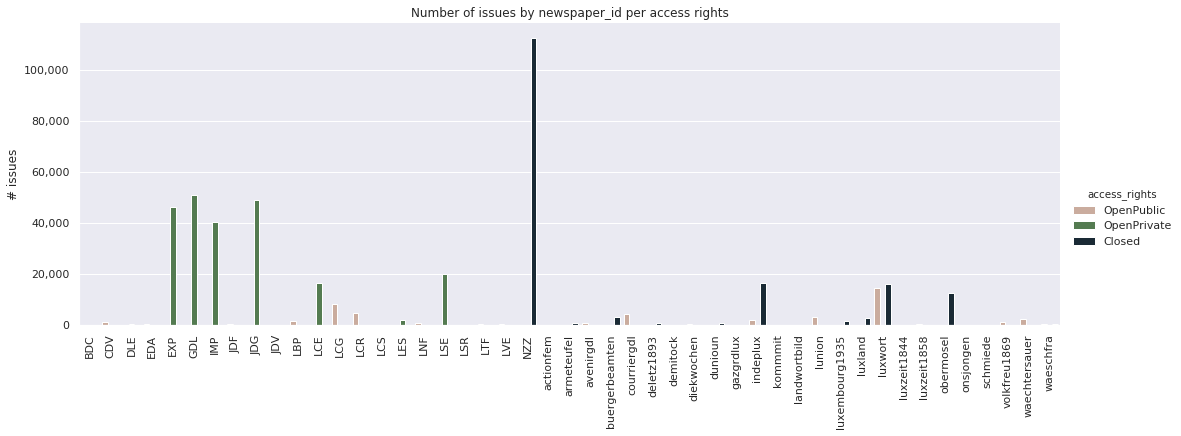

In [26]:
df = plot_licences(facet='newspapers', df=issues_df)

In [27]:
df.head()

,newspaper_id,access_rights,count
0,BDC,OpenPublic,23
1,CDV,OpenPublic,1200
2,DLE,OpenPrivate,402
3,EDA,OpenPublic,544
4,EXP,OpenPrivate,46196


##### Explanation
This plot shows that there are lots of disparities among journals, but is not very representative. In these cases the statistics table on access rights may give better information.

On can also try to plot in logarithmic scale, as well as applying several filters.